## Hypothesis tests and z-scores

Hypothesis testing use case:

***Determine whether sample statistics are close to or far away from expected (of hypothesized) values***

In [1]:
import pandas as pd

stack_overflow = pd.read_feather('./data/stack_overflow.feather')
mean_comp_samp = stack_overflow['converted_comp'].mean()  # point estimate of compensation
print(mean_comp_samp)

119574.71738168952


### Stack Overflow salary data

Research question:  ***Is this mean Data Science salary significantly different than $110k?***

1. generate a boostrap distribution
2. compute the standard error of this distribution
3. compute the z-score from the standard error
4. determine where this z-score falls in the z-score distribution relative to confidence limits

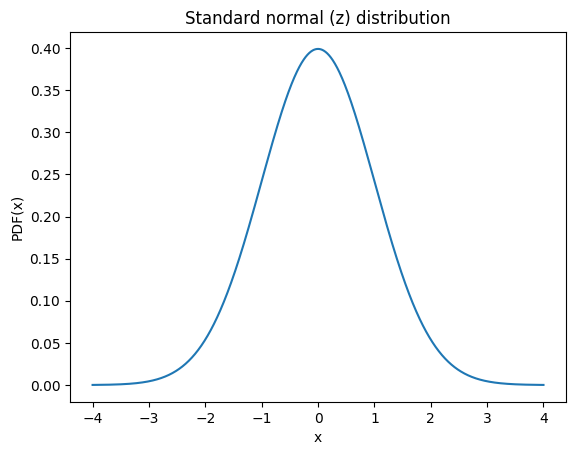

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Standard normal (z) distribution
x = []
pdf_z = []
for i in np.linspace(-4, 4, 1000):
    x.append(i)
    pdf_z.append(norm.pdf(i))

fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("PDF(x)")
ax.set_title("Standard normal (z) distribution")
ax.plot(x, pdf_z)
plt.show()

In [3]:
def get_bootstrap_dist(df_sample, sample_col, resample_rate=5000):
    """
    Computes a boostrap distribution from a column in a dataframe

    Args:
      df_sample (Dataframe): pandas dataframe which has a numeric column named sample_col
      sample_col (str): name of the column in df_sample to calculate the bootstrap from
      resample_rate (int): number of resamples (with replacement) generated to build bootstrap distribution
    """
    boot_distrib = []
    for i in range(resample_rate):
        boot_distrib.append(
            # cacluate point estimate
            np.mean(
                # resample
                df_sample.sample(frac=1, replace=True)[sample_col]
            )
        )

    return(boot_distrib)

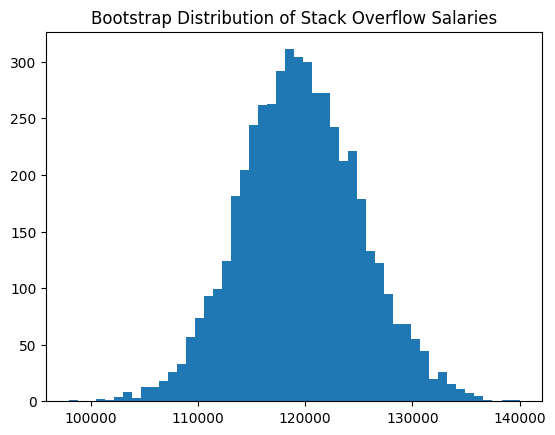

In [4]:
so_boot_distrib = get_bootstrap_dist(stack_overflow, "converted_comp")

# visualize boostrap dist
fig, ax = plt.subplots()
ax.hist(so_boot_distrib, bins=50)
ax.set_title("Bootstrap Distribution of Stack Overflow Salaries")
plt.show()

In [5]:
std_error = np.std(so_boot_distrib, ddof=1)
print(f"standard error of the boostrap distibution of SO salaries: {std_error}")

standard error of the boostrap distibution of SO salaries: 5578.528247868298


## z-scores

Before we can test hypotheses, we need to *standardize* our values.

$\Large\text{standardized value} = \frac{\text{value - mean}}{\text{standard deviation}}$

More generally:

$\Large\text{z} = \frac{\text{sample statistic - hypothetical parameter value}}{\text{standard error}}$

Intuitively, we can see that:
+ the closer the absolute value of this number is to zero, the **less likely** that the mean and the hypothesized value are significantly different.
+ the larger the absolute value of this number is, the **more likely** that the mean and the hypothsized value are significantly different.



In [6]:
# from our previous example
mean_comp_hyp = 110000  # our original hypothesized value
z_score_so_salaries = (mean_comp_samp - mean_comp_hyp) / std_error
print(f"z-score for SO salaries having hypothesized value of 110k: {z_score_so_salaries}")
print("What does this number suggest regarding our hypothesis?")

z-score for SO salaries having hypothesized value of 110k: 1.716351868496547
What does this number suggest regarding our hypothesis?


## Calculating the sample mean

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

We'll begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In [7]:
late_shipments = pd.read_feather('./data/late_shipments.feather')
print(f"shape of late shipments data: {late_shipments.shape}\n")  # (1000, 27)
print(f"columns in the late shipments data: {late_shipments.columns}\n")
print(late_shipments["late"].value_counts())

shape of late shipments data: (1000, 27)

columns in the late shipments data: Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

late
No     939
Yes     61
Name: count, dtype: int64


In [8]:
# calc the proportion of late shipments
late_prop_samp = (late_shipments["late"] == 'Yes').mean()

print(f"proportion of shipments that are late: {late_prop_samp}")

proportion of shipments that are late: 0.061


## Calculating a z-score

Since variables have arbitrary ranges and units, we need to ***standardize*** them as mentioned earlier. For example, a hypothesis test using salaries data that gave different answers if the variables were in **Euros** instead of **US dollars** would be of little value. Standardization avoids this issue.

One standardized value of interest in a hypothesis test is called a **z-score**. To calculate it, we need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

In [10]:
# create the bootstrap distribution for the proportion of late shipments
late_shipments["late_binary"] = late_shipments["late"] == "Yes"
late_shipments["late_binary"] = late_shipments["late_binary"].astype(int)
late_shipments_boot_distn = get_bootstrap_dist(late_shipments, "late_binary")
print(f"number samples in bootstrap distribution: {len(late_shipments_boot_distn)}")
print(f"first few samples of bootstrap distribution: {late_shipments_boot_distn[:5]}")

number samples in bootstrap distribution: 5000
first few samples of bootstrap distribution: [0.053, 0.075, 0.05, 0.062, 0.056]


In [11]:
# hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# calc standard error
std_error = np.std(late_shipments_boot_distn)

# calc z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

print(z_score)  # 0.1335510751060483 listed on platform, pretty close

0.13025162917084684
